chapter 04. 다양한 분류 알고리즘
###### 럭키백의 확률을 계산하라!

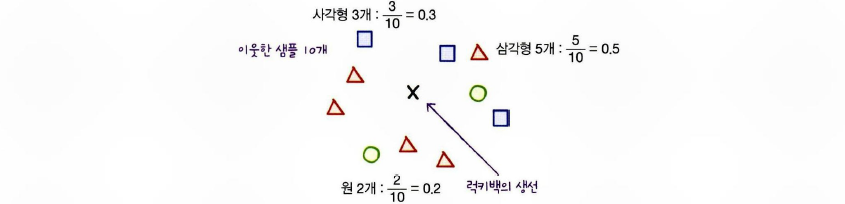

In [2]:
#pip install pandas


🕊️🕊️🕊️ 04-1 로지스틱 회귀

In [3]:
#럭키백의 확률


# 데이터 준비하기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

# 데이터프레임(dataframe)은 판다스에서 제공하는 2차원 표 형식, 넘파이 배열과 비슷하게 열과 행

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# 생선 종류
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
# 생선 종류
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]

fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [6]:
fish_target = fish['Species']


# 훈련 세트와 테스트 세트 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)


# 사이킷런 통해 훈련세트와 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [7]:
# k-최근접 이웃 분류기의 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [8]:
#KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
#사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환
#테스트 세트 처음 5개 샘플 확률 출력
#넘파이 round 함수 반올림(기본 소수점 첫째자리에서 반올림)
#decimals 유지할 소수점 자릿수 지정

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


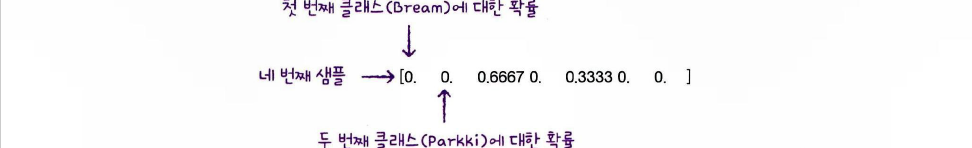

In [11]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


In [12]:
#import sklearn; print(sklearn.__version__)

In [13]:
#🎄☃️로지스틱 회귀 p9
#--이름은 회귀이지만 분류 모델이다.
#--선형 회귀와 동일하게 선형 방정식을 학습한다.

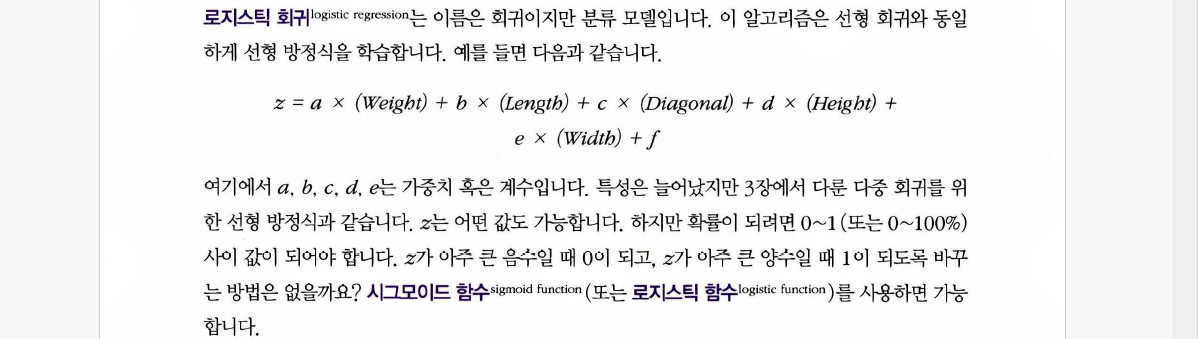

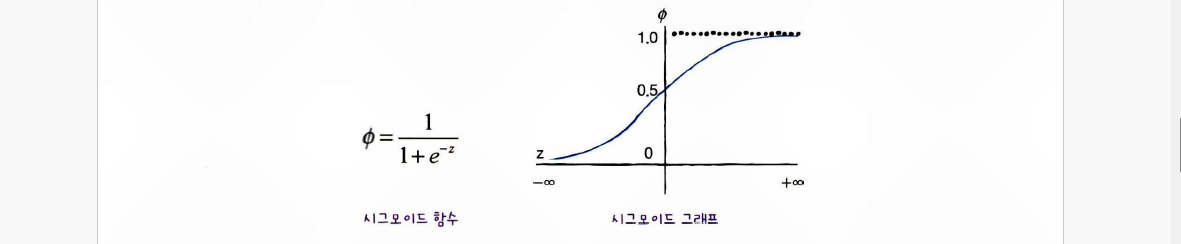

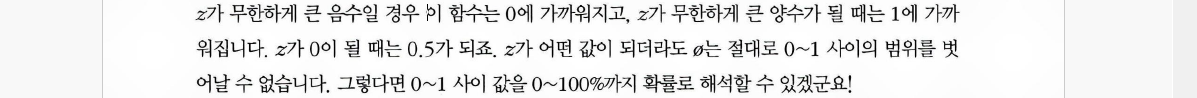

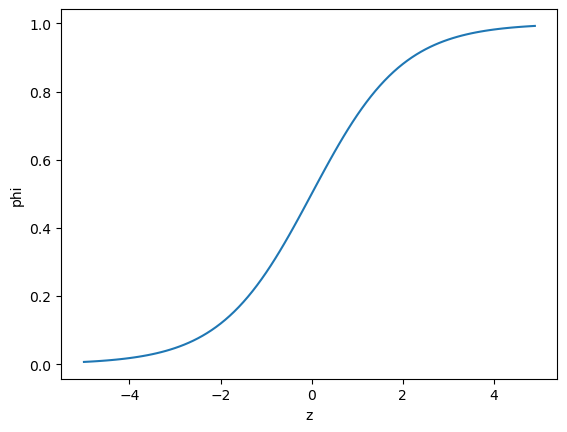

In [14]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1 ) #-5와 5사이에 0.1간격 배열 z를 만듦
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [15]:
#로지스틱 회귀로 이진 분류 수행하기
#--넘파이 배열은 True,False 값을 전달하여 행을 선택할 수 있는데 이를 '불리언 인덱싱'

# 'A'와''C'만 골라내려면 첫 번째와 세 번쨰 원소만 True이고 나머지는 False인 배열을 전달!

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
# train_target == 'Bream'과 같이 써서 도미인 행만 골라내고, OR 연산자(|)를 사용해
# 도미와 빙어에 대한 행만 골라 낼 수 있다.

bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

# bream_smelt_indexes 배열은 도미와 빙어일 경우 True, 그 외 모두 False 값이 들어감


In [17]:
# 로지스틱 회귀 모델 훈련

#klearn.linear_model 패키지 아래 LogisticRegression 클래스를 사용하여 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
# 예측 확률 : predict_proba()
#첫번째 열이 음성클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [20]:
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
#선형 회귀에서처럼 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


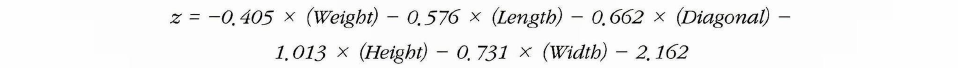

In [22]:
#LogisticRegression 클래스는 decision_function() 메서드로 Z 값을 출력
#이 z값을 시그모이들 함수에 통과시키면 확률을 얻을 수 있다.

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [23]:
#🍑 파이썬의 scopy 라이브러리 안에 시그모이드 함수 expit()가 있다.
#🍑 np.exp() 함수를 사용해 분수 계산하는 것보다 훨씬 편리

from scipy.special import expit
print(expit(decisions))

#🍋출력된 값이 predict_proba() 메서드 출력 두 번째 열의 값과 동일
#즉, decision_function() 메서드는 양성 클래스에 대한 z 값을 반환


[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


###### 1. 이진 분류를 위해 2개의 생선 샘플을 골라냈고 이를 사용해 로지스틱 회귀 모델을 훈련
###### 2. 이진 분류일 경우 predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력
###### 3. decision_function () 메서드는 양성 클래스에 대한 z 값을 계산
###### 4. coef_ 속성과 intercept—속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어있다.

In [24]:
# 로지스틱 회귀로 다중 분류 수행
# LogisticRegression 클래스를 사용해 7개의 생선을 분류해 보면서 이진 분류와의 차이점
# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘 사용
# max_iter 매개변수 에서 반복 횟수를 지정하며 기본값은 100
    #충분하게 훈련시키기 위해 반복 횟수를 1,000으로
# LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제 (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절
# alpha가 커지면 규제도 커짐
# LogisticRegression에서 규제를 제어하는 매개변수는 C
# C 는 alpha와 반대로 작을수록 규제가 커진다!
# C 의 기본값은 1
    #규제를 조금 완화하기 위해 20으로 


In [25]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 7개의 생선 데이터의 훈련 세트와 테스트 세트에 대한 점수가 과적합 혹은 과소적합 등 치우치지X


0.9327731092436975
0.925


In [26]:
#테스트 세트의 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [27]:
#테스트 세트의 처음 5개 샘플에 대한 예측 확률

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 5개 샘플에 대한 예측으로 5개 행 출력
# 7개 생선에 대한 확률 계산으로 7개의 열 출력


[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [28]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# 다중 분류일 경우 선형 방정식 모습

print(lr.coef_.shape, lr.intercept_.shape)

# 5개의 특성을 사용하여 coef_배열의 열이 5개
# 그러나 행이 7개,intercept_도 7개 --> 이진분류에서 보았던 z를 7개나 계산
#🍋다중분류는 클래스마다 z값을 하나씩 계산
#🍋가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨
# 이진분류 - 시그모이드 함수, z를 0과 1사이
# 다중분류 - 소프트맥스, 7개의 z값을 확률 변환

(7, 5) (7,)


In [30]:
### p18
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [31]:
# 앞서 구한 decision 배열을 softmax() 함수에 전달
# axis=l로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산
# axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산
# 출력 결과를 앞서 구한 proba 배열과 비교해 --> 일치!

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [32]:
###### 로지스틱 회귀는 회귀 모델이 아닌 분류 모델
###### 선형 회귀처럼 선형 방정식을 사용
###### 선형 회귀처럼 계산한 값을 그대로 출력하는 것이 아니라 로지스틱 회귀는 이 값을 0〜1 사이로 압축
###### 이 값을 마치 0〜100% 사이의 확률로 이해할 수 있음

###### 로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련
###### 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0~1 사이의 값
###### 이 값이 양성 클래스에 대한 확률
###### 음성 클래스의 확률은 1에서 양성 클래스의 확률을 빼면 됨

###### 다중 분류일 경우에는 클래스 개수만큼 방정식을 훈련
###### 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록


In [33]:
###🐬로지스틱 회귀
#--선형 방정식을 사용한 분류 알고리즘,
#--선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력
###🐬다중 분류
#--타깃 클래스가 2개 이상인 분류 
#--로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측
###🐬시그모이드 함수
#--선형 방정식의 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용
###🐬소프트맥스 함수
#--다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1 이 되도록


# scikit-learn
#🪽1. LogisticRegression: 선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스
#🪽2. predictjjroba() 메서드: 예측 확률을 반환
#🪽3. decision_function(): 모델이 학습한 선형 방정식의 출력을 반환
    # 이진 분류의 경우 양성 클래스의 확률이 반환
    # 이 값이 0보다 크면 양성 클래스, 작거나 같으면 음성 클래스로 예측


##### 🕊️🕊️🕊️ 04-2 확률적 경사 하강법 p26      
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까요?       

이런 식의 훈련 방식을 점진적 학습 또는 온라인 학습  

대표적인 점진적 학습 알고리즘은 🐬🐬확률적 경사 하강법Stochastic Gradient Descent       

In [34]:
# 확률적 경사 하강법에서 확률적이란 말은 ‘무작위하게’ 혹은 ‘랜덤하게’의 기술적인 표현
#경사(기울기)를 따라 내려가는 방법!
#가장 가파른 길을 찾아 빠르게 내려와야 하지만 조금씩 내려오는 것이 중요

#🍉p28
#🍉훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것--> 확률적 경사 하강법!!!!! 
#🍉확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크 epoch

# 미니배치 경사 하강법 minibatch gradient descent
    #-----------하나가 아니라 여러개의 샘플을 사용해 경사 하강법 수행
# 배치 경사 하강법 batch gradient descent
    #----------전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용

🍉확률적 경사 하강법        
훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘으로 매일매일 업데이트 되어도 학습을 이어 갈 수 있음!       
ex) 신경망 알고리즘

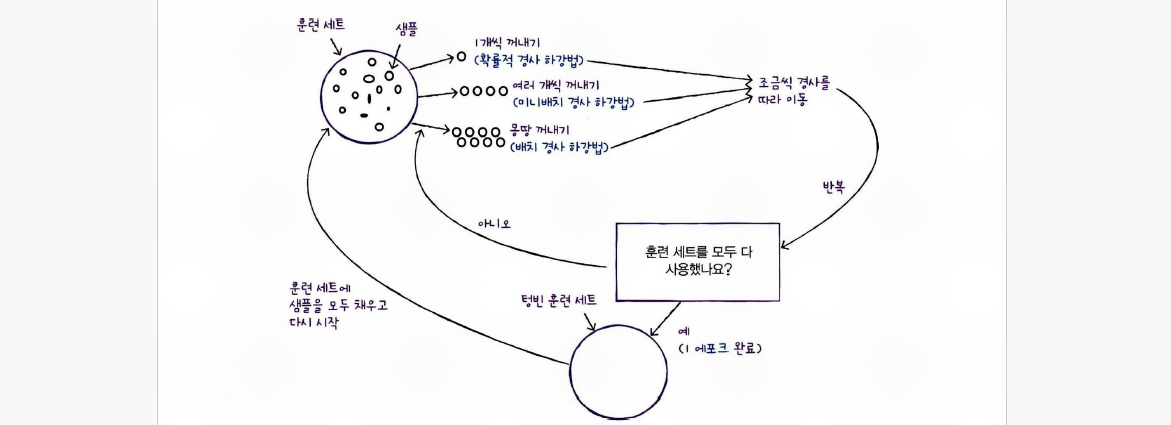

In [35]:
## 손실 함수 loss function
#--머신러닝 알고리즘이 얼마나 엉터리인지 측정


## 비용 함수 cost function
#--손실 함수는 샘플 하나에 대한 손실을 정의
#--비용 함수는 훈련 세트에 있는 모든 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합

손실 함수는 미분 가능해야 한다.

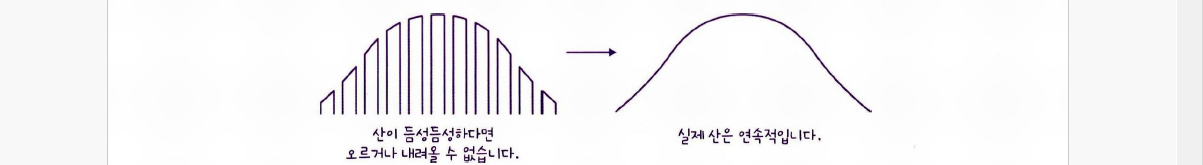

In [36]:
#🤍로지스틱 손실 함수(예측은 0 or 1이지만 확률은 0~1 사이의 어떤 값도 될 수 있음)
#--정확도에 음수를 취해서 손실함수로,,??


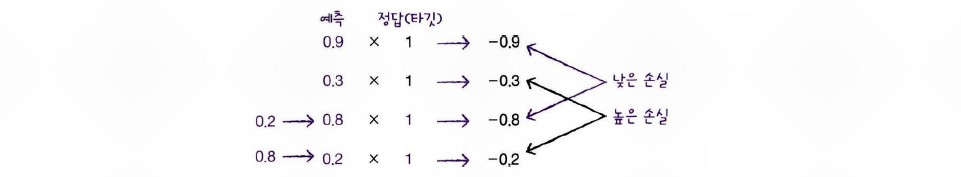
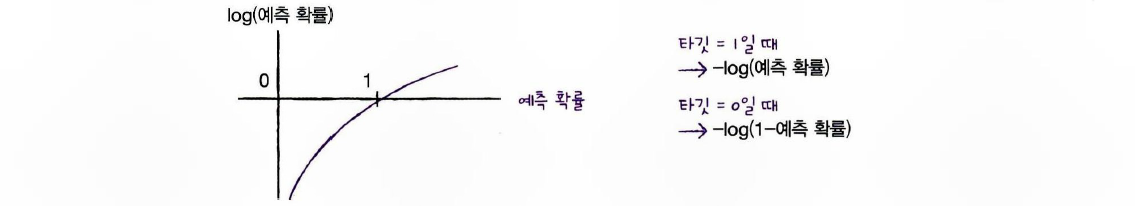
###### 양성 클래스(타깃=1)일 때, 손실은 -log(🤍예측확률)
###### 확률이 1에서 멀어져 0에 가까워질 수록 손실은 큰 양수가 됨
###### 음성 클래스(타깃=0)일 때, 손실은 -log(🤍1-예측확률)

In [37]:
#로지스틱 손실 함수 = 이진 크로스엔트로피 손실 함수 
#크로스엔트로피 손실 함수 for 다중 분류


In [38]:
#🤍 SGDClassfier

import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [39]:
# Species열을 제외한 나머지 5개 입력데이터로 사용!!
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

In [40]:
#사이킷런, 훈련세트와 테스트 세트 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [41]:
#‼️‼️훈련세트, 테스트 세트 표준화 전처리!!
#‼️‼️훈련세트에서 학습한 통계 값으로 테스트 세트도 변환!!!!!

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## train_scaled 와 test_scaled 두 넘파이 배열 준비

In [42]:
#🐬SGDClassifier : 사이킷런, 확률적 경사 하강법 제공, 대표적 분류용 클래스

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))



0.773109243697479
0.775


/home/kooyoonjung/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [43]:
#🐬SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 훈련
# 추가적인 훈련으로 이어갈 땐 #🐬partial_fit() 메서드
#🐬partial_fit()은 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다.

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


에포크와 과대/과소 적합         

훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가 but, 테스트 점수는 감소        
과대적합이 시작하기 전에 훈련을 멈추는 것을 '조기종료       
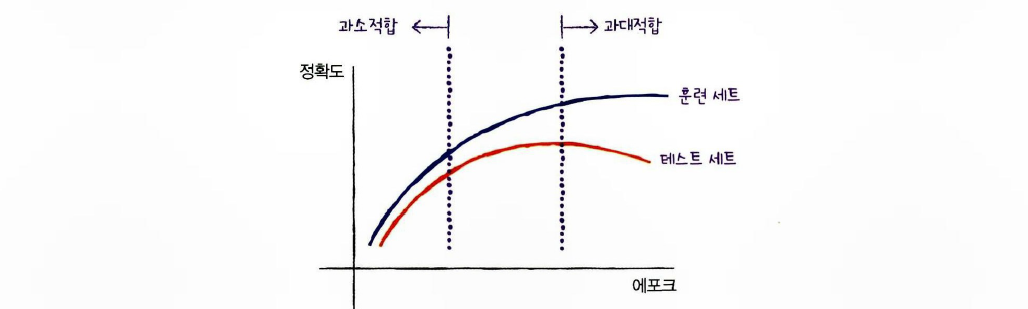


In [53]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [54]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

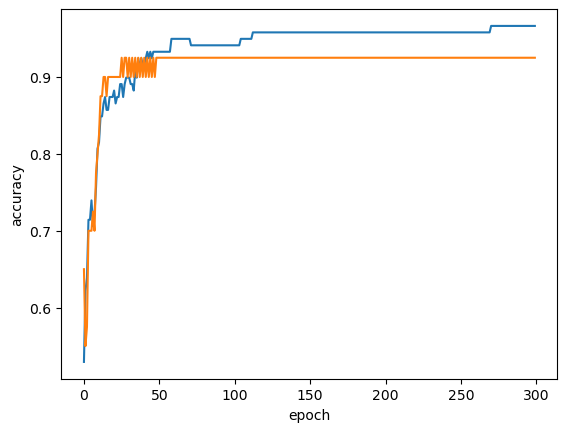

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [56]:
# 에포크(반복횟수) 100회로 낮추어 다시 훈련

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


확률적 경사 하강법 핵심 요약
###### 확률적 경사 하강법 (SGD)        
###### : 최적의 모델을 찾기 위해 샘플 하나, 미니배치, 또는 전체 배치 단위로 손실 함수의 경사를 따라 가중치를 업데이트하는 최적화 알고리즘     
###### : 한 번의 전체 데이터셋 반복을 **에포크**